In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("pima_diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

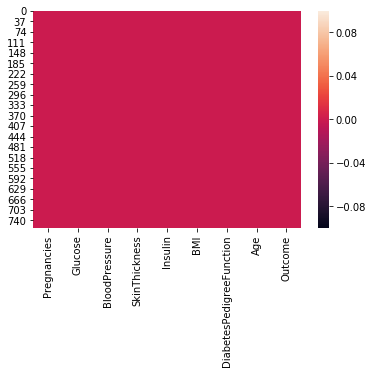

In [6]:
sns.heatmap(data.isnull())

In [7]:
#sns.pairplot(data)

In [8]:
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

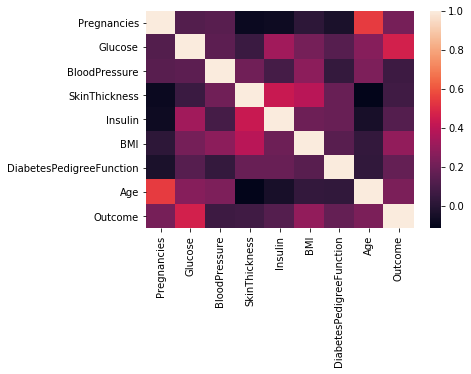

In [9]:
sns.heatmap(data.corr())

In [10]:
data.shape

(768, 9)

Pregnancies                    AxesSubplot(0.125,0.536818;0.133621x0.343182)
Glucose                     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
BloodPressure                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
SkinThickness               AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Insulin                     AxesSubplot(0.766379,0.536818;0.133621x0.343182)
BMI                               AxesSubplot(0.125,0.125;0.133621x0.343182)
DiabetesPedigreeFunction       AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age                             AxesSubplot(0.44569,0.125;0.133621x0.343182)
Outcome                        AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

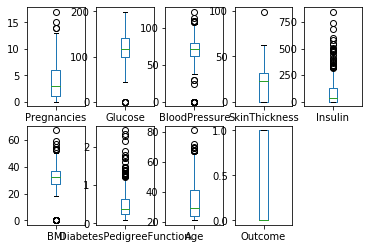

In [11]:
data.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A3331DC438>,
      dtype=object)

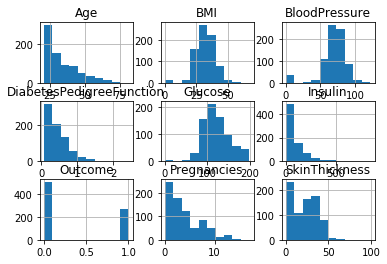

In [12]:
data.hist()

In [13]:
from scipy.stats import zscore
import numpy as np

In [14]:
z=np.abs(zscore(data))
z

array([[0.63994726, 0.84832379, 0.14964075, ..., 0.46849198, 1.4259954 ,
        1.36589591],
       [0.84488505, 1.12339636, 0.16054575, ..., 0.36506078, 0.19067191,
        0.73212021],
       [1.23388019, 1.94372388, 0.26394125, ..., 0.60439732, 0.10558415,
        1.36589591],
       ...,
       [0.3429808 , 0.00330087, 0.14964075, ..., 0.68519336, 0.27575966,
        0.73212021],
       [0.84488505, 0.1597866 , 0.47073225, ..., 0.37110101, 1.17073215,
        1.36589591],
       [0.84488505, 0.8730192 , 0.04624525, ..., 0.47378505, 0.87137393,
        0.73212021]])

In [15]:
threshold=3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [16]:
pima=data[(z<3).all(axis=1)]
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [17]:
pima.shape

(688, 9)

In [18]:
pima.skew()

Pregnancies                 0.814931
Glucose                     0.574478
BloodPressure               0.133396
SkinThickness              -0.079466
Insulin                     1.252364
BMI                         0.374415
DiabetesPedigreeFunction    1.181635
Age                         1.047105
Outcome                     0.724938
dtype: float64

In [19]:
x=pima.drop("Outcome",axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)

In [21]:
y=pima["Outcome"]
y.head()


0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [22]:
print(x.shape)
print(y.shape)

(688, 8)
(688,)


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=151)

In [24]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8344827586206897
[[89  7]
 [17 32]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        96
           1       0.82      0.65      0.73        49

    accuracy                           0.83       145
   macro avg       0.83      0.79      0.80       145
weighted avg       0.83      0.83      0.83       145



In [25]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7034482758620689
[[78 18]
 [25 24]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        96
           1       0.57      0.49      0.53        49

    accuracy                           0.70       145
   macro avg       0.66      0.65      0.66       145
weighted avg       0.69      0.70      0.70       145



In [26]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7931034482758621
[[88  8]
 [22 27]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85        96
           1       0.77      0.55      0.64        49

    accuracy                           0.79       145
   macro avg       0.79      0.73      0.75       145
weighted avg       0.79      0.79      0.78       145



In [27]:
svc=SVC(kernel="linear")
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8344827586206897
[[90  6]
 [18 31]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        96
           1       0.84      0.63      0.72        49

    accuracy                           0.83       145
   macro avg       0.84      0.79      0.80       145
weighted avg       0.83      0.83      0.83       145



In [28]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.7862068965517242
[[89  7]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        96
           1       0.78      0.51      0.62        49

    accuracy                           0.79       145
   macro avg       0.78      0.72      0.73       145
weighted avg       0.79      0.79      0.77       145



In [29]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7793103448275862
[[78 18]
 [14 35]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        96
           1       0.66      0.71      0.69        49

    accuracy                           0.78       145
   macro avg       0.75      0.76      0.76       145
weighted avg       0.78      0.78      0.78       145



In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.7172413793103448
[[83 13]
 [28 21]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        96
           1       0.62      0.43      0.51        49

    accuracy                           0.72       145
   macro avg       0.68      0.65      0.65       145
weighted avg       0.70      0.72      0.70       145



In [31]:
#checking whcih model is predicting better
print("Logistic:",(accuracy_score(y_test,predlg)))
print("DTC:",accuracy_score(y_test,preddtc))
print("KNN:",accuracy_score(y_test,predknn))
print("SVC_linear:",accuracy_score(y_test,predsvc))
print("SVC_rbf:",accuracy_score(y_test,predsv))
print("GussianNB:",accuracy_score(y_test,predgnb))

Logistic: 0.8344827586206897
DTC: 0.7034482758620689
KNN: 0.7931034482758621
SVC_linear: 0.8344827586206897
SVC_rbf: 0.7862068965517242
GussianNB: 0.7793103448275862


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [33]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
cv=cross_val_score(rfc,x_train,y_train,scoring='accuracy',cv=10)
cv.std()
cv.mean()

0.7381722889270058

In [39]:
params=[{
            
            'max_depth':[10,20,30,40,50,60,70,100],
            'min_samples_split':[2,3,4,7,10,12],
            'min_samples_leaf' :[1,3,5,10,15,20,25],
            'max_features':['sqrt','log2'],
            
        }
        ]

from sklearn.model_selection import GridSearchCV
gc=GridSearchCV(rfc,params,cv=10,scoring='accuracy',n_jobs=-1)
gc.fit(x_train,y_train)
gc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=60, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
gc.best_score_

0.8011049723756906

In [38]:
#save the model
from sklearn.externals import joblib
joblib.dump(lg,"Pima.pkl")

['Pima.pkl']